# Tutorial

In [3]:
#http://soft-matter.github.io/trackpy/v0.3.2/introduction.html#introduction

In [3]:
import sys
sys.path.append("..")
from LowLevelModules.GeneralFunctions import *
from LowLevelModules.Confocal import *

In [4]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib notebook

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')

In [5]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

In [6]:
from matplotlib.colors import LinearSegmentedColormap

In [7]:
cdict1 = {'red':   [[0.0,  0.0, 0.0],
                   [0.55,  0.0, 0.0],
                   [0.8, 1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.55, 0.0, 0.0],
                   [0.8, 1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'blue':  [[0.0,  0.0, 0.0],
                   [0.55,  1.0, 1.0],
                   [0.8, 1.0, 1.0],
                   [1.0,  1.0, 1.0]]}

In [8]:
black_blue_white1 = LinearSegmentedColormap('BlackBlueWhite1', cdict1)

## Colloids in bulk water 

In [4]:
frames = pims.ImageSequence('./sample_data/bulk_water/*.png', as_grey=True)

In [5]:
frames

<Frames>
Source: Z:\PythonPhotonicsLab\TestPrograms\sample_data\bulk_water\*.png
Length: 2 frames
Frame Shape: (424, 640, 4)
Pixel Datatype: uint8

In [6]:
print(frames[0])  # the first frame

[[124 124 124 ... 119 120 121]
 [124 124 124 ... 119 121 121]
 [124 124 123 ... 120 122 123]
 ...
 [125 126 125 ... 107  97  96]
 [125 125 124 ... 115 108 105]
 [125 125 124 ... 123 118 116]]


Frame([[124, 124, 124, ..., 119, 120, 121],
       [124, 124, 124, ..., 119, 121, 121],
       [124, 124, 123, ..., 120, 122, 123],
       ...,
       [125, 126, 125, ..., 107,  97,  96],
       [125, 125, 124, ..., 115, 108, 105],
       [125, 125, 124, ..., 123, 118, 116]], dtype=uint8)
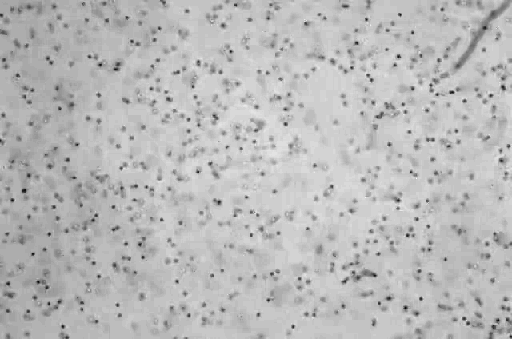

In [7]:
frames[0]

In [8]:
f = tp.locate(frames[0], 11, invert=True)

In [9]:
f.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,5.262286,585.935363,157.646052,2.894513,0.056613,4.210632,10783.0,0.081614,0
1,5.816589,294.565964,235.542740,2.119423,0.189135,15.831975,10719.0,0.091219,0
2,5.866454,338.151322,184.762521,2.075709,0.162566,12.631895,10627.0,0.109795,0
3,6.795322,310.512281,144.003606,3.107998,0.040535,4.463270,10491.0,0.157081,0
4,7.275244,359.742671,51.706558,2.954872,0.435430,2.021103,10171.0,-11.764118,0


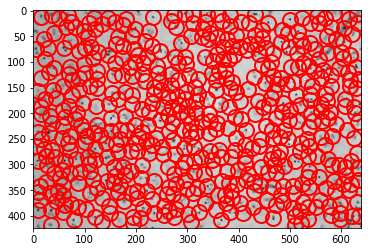

In [10]:
plt.figure()  # make a new figure
tp.annotate(f, frames[0]);

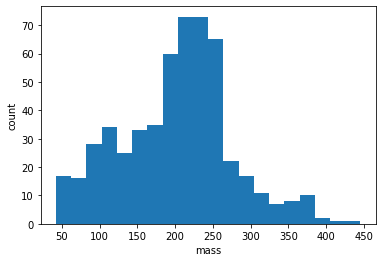

In [11]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

In [12]:
f = tp.locate(frames[0], 11, invert=True, minmass=200)

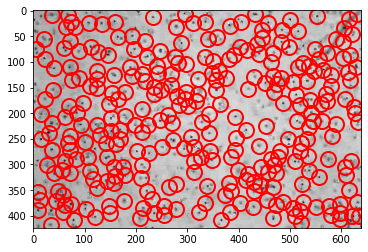

In [13]:
plt.figure()
tp.annotate(f, frames[0]);

<Figure size 432x288 with 0 Axes>

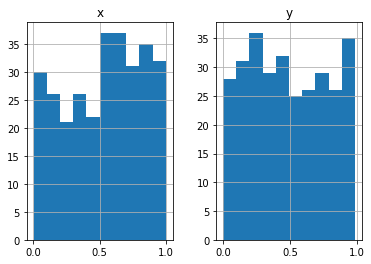

In [14]:
plt.figure()
tp.subpx_bias(f);

<Figure size 432x288 with 0 Axes>

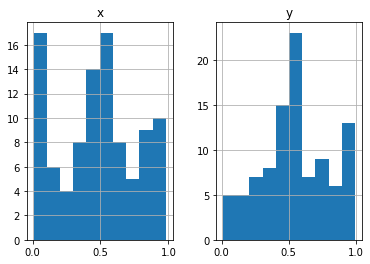

In [15]:
plt.figure()
tp.subpx_bias(tp.locate(frames[0], 31, invert=True, minmass=200));

# Particle tracking from FSM 2D scan 
no preprocessing

In [11]:
def load_and_track(directory,fileprefix,fileext=".dat",radius = 3,minmass=None,preprocess=False):
    """load FSM 2D scan"""
#     directory = r'C:\data\200203\FSM-2D'
#     fileprefix = '200203FSM54 FSM-2D'
#     fileext = ".dat"
#     filename = '200203FSM54 FSM-2D Z.dat'
    filename = fileprefix +' Z'+fileext
    # fileprefix = 
    # also read from file name X Y Z
    usersDf = pd.read_csv(directory+'\\' + fileprefix + ' Z' + fileext, skiprows=0,delim_whitespace=True,header=None).values
    numX,numY=usersDf.shape
    f = tp.locate(usersDf, radius, invert=False,minmass=minmass,preprocess=preprocess)

    usersDfX = pd.read_csv(directory+'\\' + fileprefix + ' X' + fileext, skiprows=0,delim_whitespace=True,header=None).values
    usersDfY = pd.read_csv(directory+'\\' + fileprefix + ' Y' + fileext, skiprows=0,delim_whitespace=True,header=None).values

    usersDfX = np.reshape(usersDfX,usersDfX.size)
    usersDfY = np.reshape(usersDfY,usersDfY.size)

    if usersDfY[0]<usersDfY[-1]:
        originPosition = 'lower'
    else:
        originPosition = 'upper'
        
    pltstyle = {
      "origin": originPosition
    }
        
    extent = [usersDfX[0], usersDfX[-1], min(usersDfY[0], usersDfY[-1]),max(usersDfY[0], usersDfY[-1]) ]
    fig2,ax2 = plt.subplots(figsize=(6,6))

    plt.imshow(usersDf,origin=originPosition,extent=extent,cmap=black_blue_white1)
    # use lifeplot and take into account of the X,Y axis data
#     lp = LivePlot2DV2((6, 8), usersDfX, usersDfY, usersDf, 'x (um)', 'y (um)', 'APD (kct/s)')
#     lp = LivePlot2DV2( usersDfX, usersDfY, usersDf)
    
    # tp.annotate(f, usersDf,plot_style={'markersize':7},imshow_style=pltstyle)
    for i in list(range(  len(f))):

        xcoor = usersDfX[0] + (usersDfX[-1]-usersDfX[0])*(f.iloc[i].x   )/( numX  )
        ycoor = usersDfY[0] + (usersDfY[-1]-usersDfY[0])*(f.iloc[i].y   )/( numY  )
        plt.scatter(xcoor, ycoor, s=100, facecolors='none', edgecolors='r')
        ax2.annotate(str(i),(xcoor,ycoor),fontsize=12,color='black',
                     bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.6))
    plt.xlabel('', labelpad=16, fontsize=16)
    plt.ylabel('', labelpad=16, fontsize=16)    
    ax2.tick_params(axis='both', labelsize=16)
    plt.title(directory+"\\"+filename,fontsize=16)
    return f
    # # https://stackoverflow.com/questions/24108063/matplotlib-two-different-colors-in-the-same-annotate/49041502

In [17]:
def load_and_track_raw(directory,fileprefix,fileext=".dat"):
    """load FSM 2D scan
        plot with pixel numbers, not actual distance
    """
    filename = fileprefix +' Z'+fileext
    # also read from file name X Y Z
    usersDf = pd.read_csv(directory+'\\' + fileprefix + ' Z' + fileext, skiprows=0,delim_whitespace=True,header=None).values
    numX,numY=usersDf.shape
    f = tp.locate(usersDf, 3, invert=False,minmass=0,preprocess=False)
    pltstyle = {
      "origin": "upper"
    }
    tp.annotate(f, usersDf,plot_style={'markersize':7},imshow_style=pltstyle)
    print(directory+"\\"+filename)

In [9]:
%matplotlib notebook
f=load_and_track(r'C:\data\200203\FSM-2D','200203FSM54 FSM-2D')

FileNotFoundError: [Errno 2] File b'C:\\data\\200203\\FSM-2D\\200203FSM54 FSM-2D Z.dat' does not exist: b'C:\\data\\200203\\FSM-2D\\200203FSM54 FSM-2D Z.dat'

In [15]:
f.iloc[0].x=2

c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
f.at[0,'x']=2

In [18]:
f

,y,x,mass,size,ecc,signal,raw_mass,ep
0,2.027123,2.000000,40.770510,0.878195,0.266055,9.327216,40.86,NaN
1,2.020344,42.018779,30.722118,0.883690,0.258517,6.730980,30.82,NaN
2,2.969697,33.053391,33.318353,0.882735,0.250000,7.356000,33.42,NaN
3,2.992722,55.017467,33.029882,0.882467,0.345794,7.307922,33.16,NaN
4,8.002660,48.027482,54.232471,0.886262,0.209932,11.634980,54.34,NaN
5,8.994421,34.039052,34.472235,0.883760,0.258929,7.548314,34.60,NaN
6,12.016230,53.998752,38.510824,0.885449,0.265924,8.317569,38.62,NaN
7,14.016083,42.982971,50.818902,0.884535,0.298670,11.058039,50.94,NaN
8,14.981679,48.033588,31.491373,0.885851,0.270428,6.779059,31.64,NaN
9,18.038293,43.954048,43.943686,0.881986,0.247539,9.759922,44.04,NaN


<IPython.core.display.Javascript object>


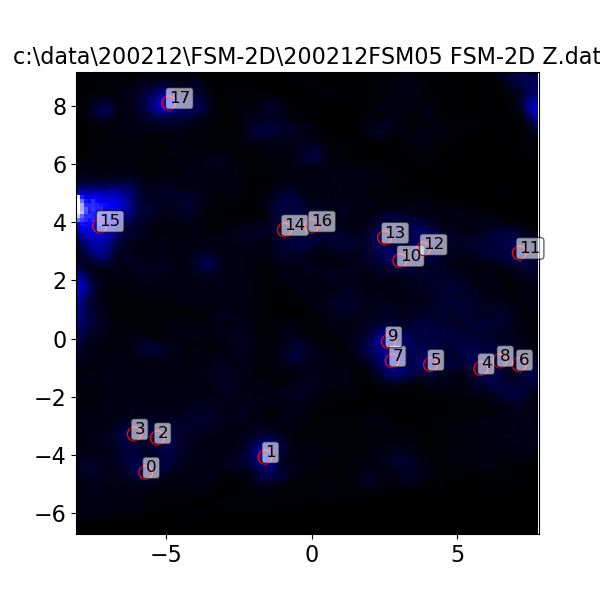

In [14]:
load_and_track(r'c:\data\200212\FSM-2D','200212FSM05 FSM-2D',minmass=500);

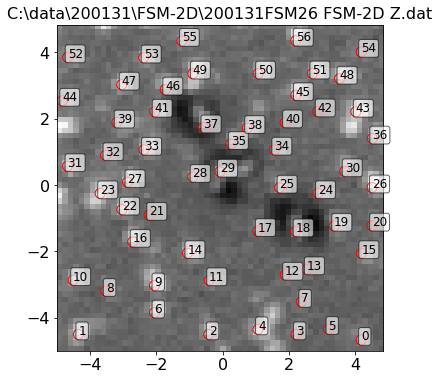

In [329]:
load_and_track(r'C:\data\200131\FSM-2D','200131FSM26 FSM-2D');

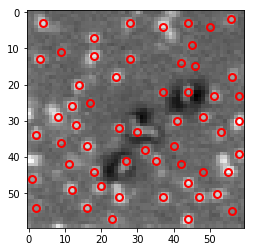

C:\data\200131\FSM-2D\200131FSM26 FSM-2D Z.dat


In [320]:
load_and_track_raw(r'C:\data\200131\FSM-2D','200131FSM26 FSM-2D');

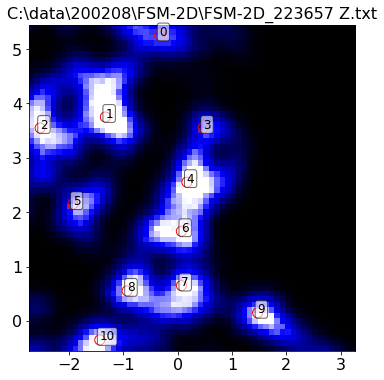

In [55]:
load_and_track(r'C:\data\200208\FSM-2D','FSM-2D_223657','.txt',minmass=0);

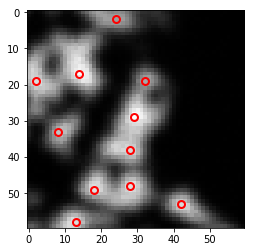

C:\data\200208\FSM-2D\FSM-2D_223657 Z.txt


In [24]:
load_and_track_raw(r'C:\data\200208\FSM-2D','FSM-2D_223657','.txt');

# some more FSM images

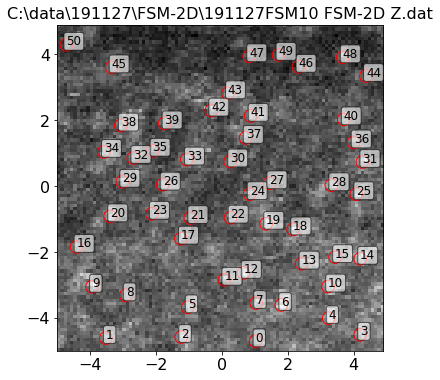

In [321]:
f=load_and_track(r'C:\data\191127\FSM-2D','191127FSM10 FSM-2D',radius=5,preprocess=True,minmass=2)

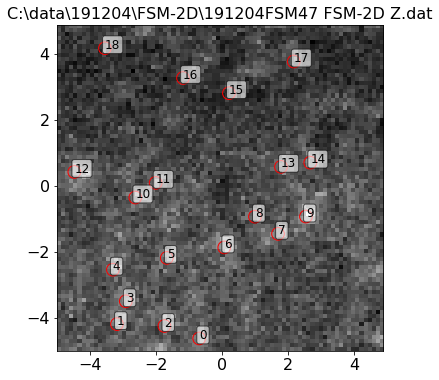

In [322]:
f=load_and_track(r'C:\data\191204\FSM-2D','191204FSM47 FSM-2D',radius=5,preprocess=True,minmass=1)

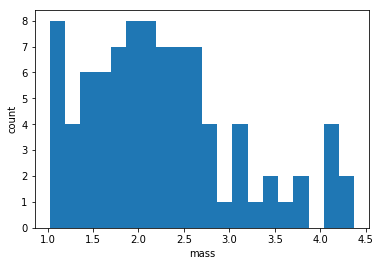

In [323]:
f = tp.locate(usersDf, 5, invert=False,minmass=1)
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

# Test tracking with simulated data 
pretty good - NO preprocess
probably best to play around with the minmass to reject spurious particles

not sure how preprocess mess up the data, but it did

In [10]:
def gaussian2D(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

In [35]:
sdev

0.16986436005760383

In [36]:
sdev*60/10

1.019186160345623

60.0
4.416473361497699
Mean NV count = 750.0
Mean bkg count = 0.0
SNR (amplitude) = 27.386127875258303
Total number of defects = 1
23 25


<IPython.core.display.Javascript object>


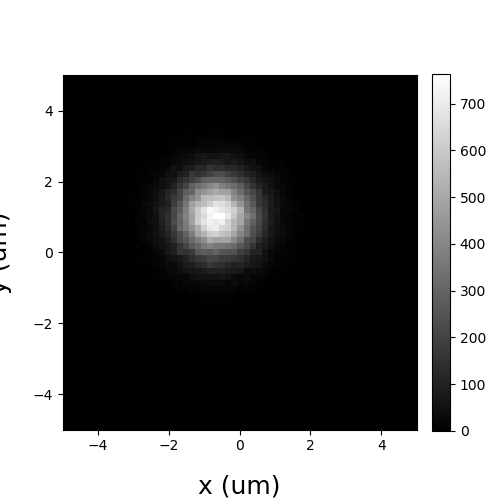

In [50]:
# define 

# Create the gaussian data

L0 = 10 # um
fwhm = 10.4 # um
sdev = fwhm/(2*np.sqrt(2*np.log(2)))
step = 10/60
print(L0/step)
Xin, Yin = np.mgrid[-L0/2:L0/2+step:step, -L0/2:L0/2+step:step]

Xinpx, Yinpx = np.mgrid[0:L0/step-1, 0:L0/step-1]


print(sdev)
Apeak = 3e3 # C/s, NV count rate
sweepRate = 4 # Hz
# at NV, mean count = Apeak/sweepRate
# data = gaussian2D(0, 0, 0, sdev, sdev)(Xin, Yin)
data = gaussian2D(0, 0, 0, sdev, sdev)(Xinpx, Yinpx)
bkg = 0*2e3 # APD dark count + surface FL + residual reflection
# defect 2D density SiV/um^2

print(f'Mean NV count = {Apeak/sweepRate}')
print(f'Mean bkg count = {bkg/sweepRate}')
print(f'SNR (amplitude) = {(Apeak/sweepRate)/np.sqrt((Apeak+2*bkg)/sweepRate)}')

n2D = 0.01
ndefect = np.random.poisson(n2D*L0*L0)

ndefect=1
print(f'Total number of defects = {ndefect}')
for i in range(ndefect):
#     x,y = np.random.uniform(-L0/2,L0/2,2)
#     print(x,y)
#     data += gaussian2D(Apeak/sweepRate, x, y, sdev, sdev)(Xin, Yin)
    
    x,y = np.random.uniform(0,L0/step-1,2)
#     x = L0/step/2
#     y=L0/step/2
    print(int(x),int(y))
    data += gaussian2D(Apeak/sweepRate, int(x),int(y), sdev,sdev)(Xinpx, Yinpx)
    
#     data[int(x),int(y)]+=100
    
    
    
data+= bkg/sweepRate
data = np.random.poisson(data)
# print(f'SNR (amplitude) = {Apeak/sweepRate/np.sqrt( (Apeak+bkg)/sweepRate  )}')

fig1, ax1 = plt.subplots(1, 1, figsize=(5,5))


# cp1 = ax1.imshow(data, cmap='gray', extent=extent,
#                  interpolation='nearest', aspect=1)


# cb1 = fig1.colorbar(cp1, fraction=0.046, pad=0.04)
# ax1.set_xlabel('x (um)', labelpad=10, fontsize=18)
# ax1.set_ylabel('y (um)', labelpad=10, fontsize=18)
# cb1.set_label('APD counts (kHz)', labelpad=20, fontsize=18)
# cb1.ax.set_yticklabels(cb1.ax.get_yticklabels(), fontsize=16)
# ax1.tick_params(axis='both', labelsize=16)


cp1 = plt.imshow(data, cmap='gray', interpolation='nearest',extent = [-L0/2,L0/2,-L0/2,L0/2 ])
cb1 = fig1.colorbar(cp1, fraction=0.046, pad=0.04)
ax1.set_xlabel('x (um)', labelpad=15, fontsize=18)
ax1.set_ylabel('y (um)', labelpad=15, fontsize=18)
cb1.set_label('APD counts', labelpad=20, fontsize=18)


In [51]:
# f = tp.locate(data,25,invert=False,max_iterations=600,smoothing_size=33,noise_size=3)
# f = tp.locate(data,21,invert=False,smoothing_size=33,noise_size=1,maxsize=33,filter_after=False)
f = tp.locate(data,3,invert=False,preprocess=False,minmass=1650)
f.shape

(1, 8)

<IPython.core.display.Javascript object>


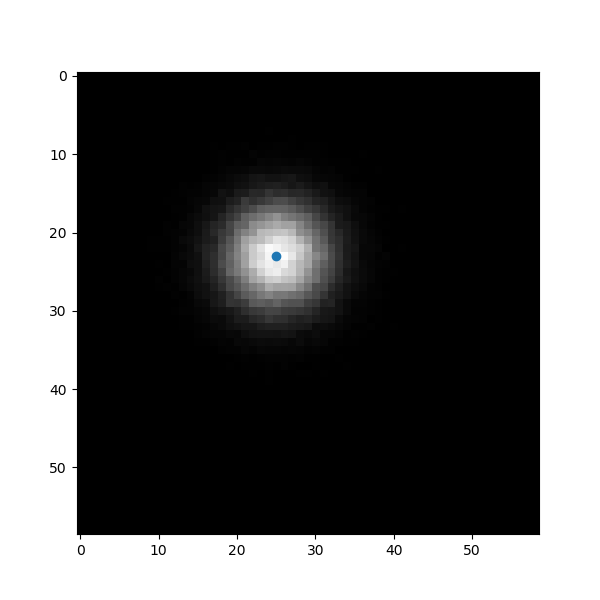

In [52]:
plt.figure(figsize=(6,6))
plt.imshow(data)
plt.scatter(f.values[:,1],f.values[:,0])

In [48]:
f

,y,x,mass,size,ecc,signal,raw_mass,ep
0,17.003445,9.993396,3483.0,0.885167,0.295713,754.0,3483.0,0.0


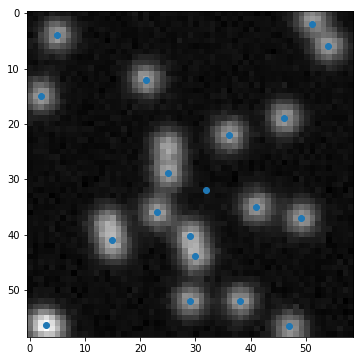

In [337]:
frefine=tp.refine_com(data,data, 3,f)

plt.figure(figsize=(6,6))
plt.imshow(data)
plt.scatter(frefine.values[:,1],frefine.values[:,0])

# Systematic shift from not so good parameters in locate()

Blob sdev (um) = 0.16986436005760383
Mean NV count = 75000.0
Mean bkg count = 500.0
SNR (amplitude) = 272.05359379125434


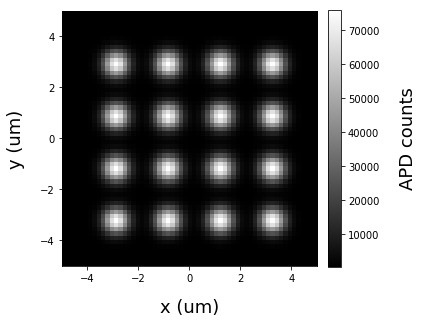

In [182]:
# generate a grid with center at integer pixel value. Here 12,24,36
L0 = 10 # um
fwhm = 0.4 # um
sdev = fwhm/(2*np.sqrt(2*np.log(2)))
step = 10/60
Xin, Yin = np.mgrid[-L0/2:L0/2+step:step, -L0/2:L0/2+step:step]
Xinpx, Yinpx = np.mgrid[0:L0/step-1, 0:L0/step-1]
N0 = int(L0/step)

print('Blob sdev (um) = '+str(sdev))
Apeak = 300e3 # C/s, NV count rate
sweepRate = 4 # Hz # at NV, mean count = Apeak/sweepRate
data = gaussian2D(0, 0, 0, sdev, sdev)(Xinpx, Yinpx)
bkg = 2e3 # APD dark count + surface FL + residual reflection

print(f'Mean NV count = {Apeak/sweepRate}')
print(f'Mean bkg count = {bkg/sweepRate}')
print(f'SNR (amplitude) = {(Apeak/sweepRate)/np.sqrt((Apeak+2*bkg)/sweepRate)}')

Xgrid, Ygrid = np.mgrid[int(N0/5):int(N0*5/5):int(N0/5), int(N0/5):int(N0*5/5):int(N0/5)]

for i in range(len(Xgrid)):
    for j in range(len(Xgrid[i])):
        data += gaussian2D(Apeak/sweepRate,Xgrid[i,j],Ygrid[i,j], 2,2)(Xinpx, Yinpx)
        
data+= bkg/sweepRate
data = np.random.poisson(data)

fig1, ax1 = plt.subplots(1, 1, figsize=(5,5))

cp1 = plt.imshow(data, cmap='gray', interpolation='nearest',extent = [-L0/2,L0/2,-L0/2,L0/2 ])
cb1 = fig1.colorbar(cp1, fraction=0.046, pad=0.04)
ax1.set_xlabel('x (um)', labelpad=15, fontsize=18)
ax1.set_ylabel('y (um)', labelpad=15, fontsize=18)
cb1.set_label('APD counts', labelpad=20, fontsize=18)


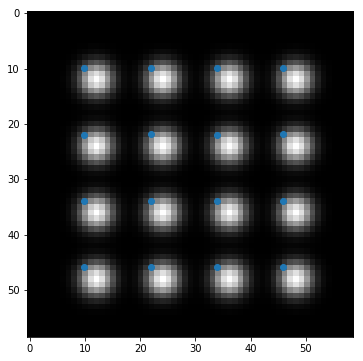

In [183]:
f = tp.locate(data,5,invert=False,smoothing_size=13)

plt.figure(figsize=(6,6))
plt.imshow(data)
plt.scatter(f.values[:,1],f.values[:,0])

# better results by refining

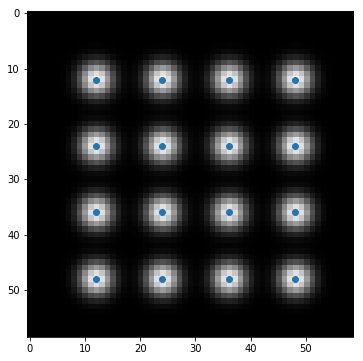

In [184]:
# deviation on the order of 0.005 pixel
frefine=tp.refine_com(data,data, 5,f)

plt.figure(figsize=(6,6))
plt.imshow(data)
plt.scatter(frefine.values[:,1],frefine.values[:,0])

# Or via diffrent parameters in tp.locate() 

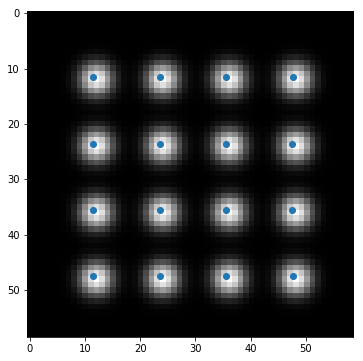

In [190]:
f = tp.locate(data,3,invert=False,smoothing_size=21)

plt.figure(figsize=(6,6))
plt.imshow(data)
plt.scatter(f.values[:,1],f.values[:,0])


# this can be further improved by refining 

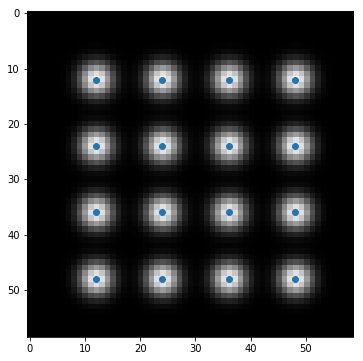

In [186]:
frefine=tp.refine_com(data,data, 5,f)

plt.figure(figsize=(6,6))
plt.imshow(data)
plt.scatter(frefine.values[:,1],frefine.values[:,0])

# In the limit of very large signal-to-noise, no need to do background subtraction. Also no need to blur out signal.
NO preprocessing gives pretty good result

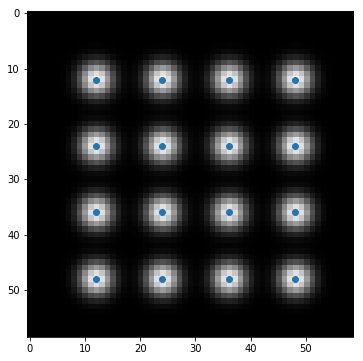

In [187]:
f = tp.locate(data,7,preprocess=False)

# f = tp.locate(data,3,minmass=0,maxsize=5,separation=7,invert=False,smoothing_size=None,noise_size=1,preprocess=False)

plt.figure(figsize=(6,6))
plt.imshow(data)
plt.scatter(f.values[:,1],f.values[:,0])

# Uncertainty

In [175]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import trackpy as tp
import pims

# mpl.style.use('http://tiny.cc/leheny-style-sans-serif/raw')  # optional, just for plot style

In [176]:
class SimulatedFrame(object):

    def __init__(self, shape, dtype=np.uint8):
        self.image = np.zeros(shape, dtype=dtype)
        self._saturation = np.iinfo(dtype).max
        self.shape = shape
        self.dtype =dtype

    def add_spot(self, pos, amplitude, r, ecc=0):
        "Add a Gaussian spot to the frame."
        x, y = np.meshgrid(*np.array(list(map(np.arange, self.shape))) - np.asarray(pos))
        spot = amplitude*np.exp(-((x/(1 - ecc))**2 + (y*(1 - ecc))**2)/(2*r**2)).T
        self.image += np.clip(spot, 0, self._saturation).astype(self.dtype)

    def with_noise(self, noise_level, seed=0):
        "Return a copy with noise."
        rs = np.random.RandomState(seed)
        noise = rs.randint(-noise_level, noise_level, self.shape)
        noisy_image = np.clip(self.image + noise, 0, self._saturation).astype(self.dtype)
        return noisy_image

    def add_noise(self, noise_level, seed=0):
        "Modify in place with noise."
        self.image = self.with_noise(noise_level, seed=seed)

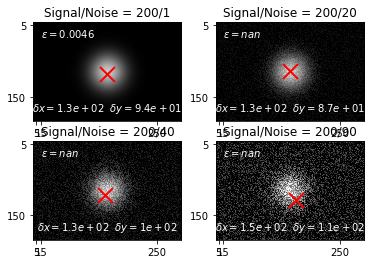

In [177]:
fig, axes = plt.subplots(2, 2)

frame = SimulatedFrame((200, 300))
frame.add_spot((100, 150), 200, 25)

for ax, noise_level in zip(axes.ravel(), [1, 20, 40, 90]):
    noisy_copy = frame.with_noise(noise_level)
    features = tp.locate(noisy_copy, 13, topn=1, engine='python')
    tp.annotate(features, noisy_copy, plot_style=dict(marker='x'), imshow_style=dict(vmin=0, vmax=255), ax=ax)
    dx, dy, ep = features[['x', 'y', 'ep']].iloc[0].values - [16, 10, 0]
    ax.set(xticks=[5, 15, 250], yticks=[5, 150])
    ax.set(title=r'Signal/Noise = {signal}/{noise}'.format(
              signal=200, noise=noise_level))
    ax.text(0.5, 0.1, r'$\delta x={dx:.2}$  $\delta y={dy:.2}$'.format(
                dx=abs(dx), dy=abs(dy)), ha='center', color='white', transform=ax.transAxes)
    ax.text(0.05, 0.85, r'$\epsilon={ep:.2}$'.format(ep=abs(ep)), ha='left', color='white',
            transform=ax.transAxes)
fig.subplots_adjust()

1
           y          x     mass     size       ecc  signal  raw_mass  ep
5  100.06324  149.99835  98165.0  9.05356  0.008785   255.0   98165.0 NaN


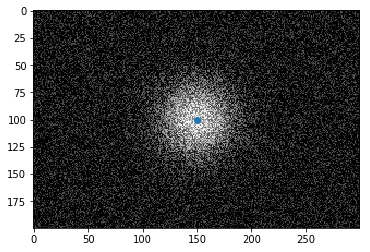

In [181]:
# turn off preprocess
f = tp.locate(noisy_copy,27 ,invert=False,noise_size =1,topn=1,preprocess=False)
print(f.shape[0])
print(f)
plt.imshow(noisy_copy)
plt.scatter(f.values[:,1],f.values[:,0])